In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import background_red 

In [15]:
raman_df = pd.read_csv('operando_blue_laser_15x10_25p_3_cycles.txt',header=None)
raman_df = raman_df[0].str.split(expand=True).astype(float)
raman_df.iloc[0, 1:] = raman_df.iloc[0, :-1].values
raman_df.iloc[0, 0] = None 
raman_df.rename(columns={0:'timestamp'},inplace=True)

raman_df_notime = raman_df.drop(labels=['timestamp'],axis=1).transpose()
raman_df_notime.rename(columns={0:'wave number'},inplace=True)
timestamps = raman_df['timestamp'][1:].astype(int)
raman_df_just_raman = raman_df_notime.drop(labels='wave number',axis=1)
raman_df_just_raman = raman_df_just_raman.rename(columns=timestamps)

In [16]:
raman_df_red = pd.read_csv('run_1_full.txt',header=None)
raman_df_red = raman_df_red[0].str.split(expand=True).astype(float)
raman_df_red.iloc[0, 1:] = raman_df_red.iloc[0, :-1].values
raman_df_red.iloc[0, 0] = None 
raman_df_red.rename(columns={0:'timestamp'},inplace=True)

raman_df_red_notime = raman_df.drop(labels=['timestamp'],axis=1).transpose()
raman_df_red_notime.rename(columns={0:'wave number'},inplace=True)
timestamps_red = raman_df_red['timestamp'][1:].astype(int)

raman_df_red_just_raman = raman_df_red_notime.drop(labels='wave number',axis=1)
raman_df_red_just_raman = raman_df_red_just_raman.rename(columns=timestamps)

In [17]:
operando_redlaser_df = pd.read_csv('groupe3b_CV_0.1mV_s_red_laser_C01.txt',header=None)
operando_redlaser_df = operando_redlaser_df[0].str.split(expand=True)
operando_redlaser_df.columns = operando_redlaser_df.iloc[0]
operando_redlaser_df = operando_redlaser_df.drop(0)
operando_redlaser_df.drop(['number'],axis=1)
operando_redlaser_df = operando_redlaser_df.astype(float)

operando_blue1_df = pd.read_csv('group_b_operando_2_blue_15s_x10_25p_C01.txt',header=None)
operando_blue1_df = operando_blue1_df[0].str.split(expand=True)
operando_blue1_df.columns = operando_blue1_df.iloc[0]
operando_blue1_df = operando_blue1_df.drop(0)
operando_blue1_df.drop(['number'],axis=1)
operando_blue1_df = operando_blue1_df.astype(float)

In [18]:
# testing the background noise reduction

corr1 = background_red.backcor(np.array(raman_df_notime['wave number']),np.array(raman_df_notime[1]),ord=3,s=1e-3,fct='sh')
corr2 = background_red.backcor(np.array(raman_df_notime['wave number']),np.array(raman_df_notime[1]),ord=3,s=1e-3,fct='ah')
corr3 = background_red.backcor(np.array(raman_df_notime['wave number']),np.array(raman_df_notime[1]),ord=3,s=1e-3,fct='stq')
corr4 = background_red.backcor(np.array(raman_df_notime['wave number']),np.array(raman_df_notime[1]),ord=3,s=1e-3,fct='atq')

corrected1 = raman_df_notime[1] - corr1[0]
corrected2 = raman_df_notime[1] - corr2[0] # bäst? 
corrected3 = raman_df_notime[1] - corr3[0] # dålig
corrected4 = raman_df_notime[1] - corr4[0]

In [19]:
# testing the background noise reduction

corr1 = background_red.backcor(np.array(raman_df_notime['wave number']),np.array(raman_df_notime[530]),ord=3,s=1e-5,fct='sh')
corr2 = background_red.backcor(np.array(raman_df_notime['wave number']),np.array(raman_df_notime[530]),ord=3,s=1e-5,fct='ah')
corr3 = background_red.backcor(np.array(raman_df_notime['wave number']),np.array(raman_df_notime[530]),ord=3,s=1e-5,fct='stq')
corr4 = background_red.backcor(np.array(raman_df_notime['wave number']),np.array(raman_df_notime[530]),ord=3,s=1e-5,fct='atq')

corrected1 = raman_df_notime[1] - corr1[0]
corrected2 = raman_df_notime[1] - corr2[0] # bäst? 
corrected3 = raman_df_notime[1] - corr3[0] # dålig
corrected4 = raman_df_notime[1] - corr4[0]

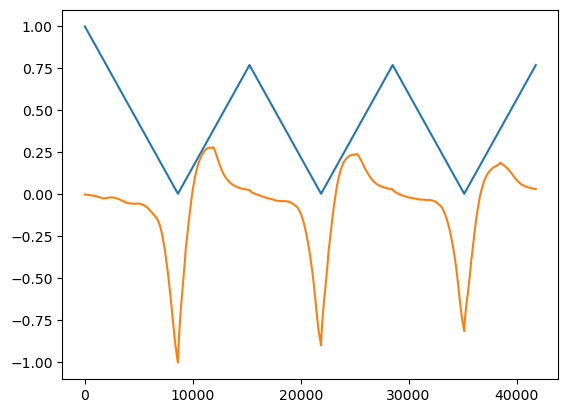

In [20]:
plt.plot(operando_blue1_df['time/s'],operando_blue1_df['Ewe/V']/np.max(operando_blue1_df['Ewe/V']))
plt.plot(operando_blue1_df['time/s'],operando_blue1_df['<I>/mA']/np.max(np.abs(operando_blue1_df['<I>/mA'])))


In [21]:
# trying to separate intercalated data from non-intercalated (blue laser)
operando_blue1_removestart = operando_blue1_df[operando_blue1_df['time/s'] > 5000]

timestamps_low_voltage = list(operando_blue1_removestart[operando_blue1_removestart['Ewe/V']/np.max(operando_blue1_removestart['Ewe/V']) < 0.1]['time/s'].astype(int))
timestamps_high_voltage = list(operando_blue1_removestart[operando_blue1_removestart['Ewe/V']/np.max(operando_blue1_removestart['Ewe/V']) > 0.9]['time/s'].astype(int))

low_voltage_measurements = raman_df_just_raman.loc[:, (raman_df_just_raman.columns > 7990) & (raman_df_just_raman.columns < 9250) | 
                                                    (raman_df_just_raman.columns > 21250) & (raman_df_just_raman.columns < 22520) | 
                                                    (raman_df_just_raman.columns > 34520) & (raman_df_just_raman.columns < 35790)]

high_voltage_measurements = raman_df_just_raman.loc[:, (raman_df_just_raman.columns > 14580) & (raman_df_just_raman.columns < 15930) | 
                                                    (raman_df_just_raman.columns > 27850) & (raman_df_just_raman.columns < 29190) | 
                                                    (raman_df_just_raman.columns > 41120) & (raman_df_just_raman.columns < 41790)]


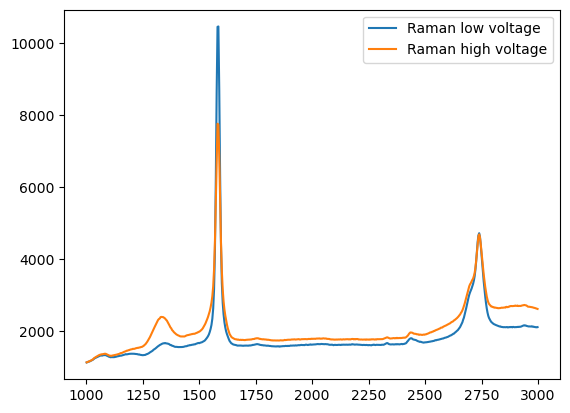

In [22]:
mean_low = low_voltage_measurements.sum(axis=1) / low_voltage_measurements.shape[1]
mean_high = high_voltage_measurements.sum(axis=1) / high_voltage_measurements.shape[1]

plt.plot(raman_df_notime['wave number'],mean_low,label='Raman low voltage')
plt.plot(raman_df_notime['wave number'],mean_high,label='Raman high voltage')
plt.legend()

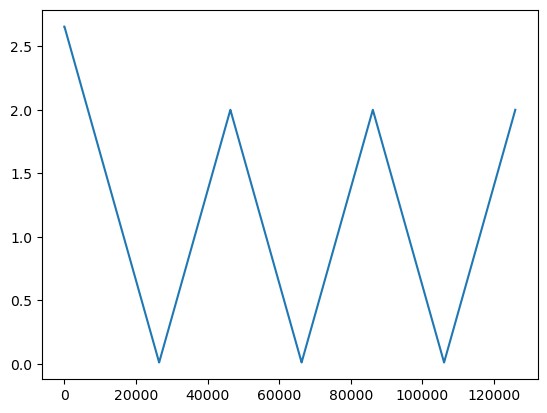

In [23]:
plt.plot(operando_redlaser_df['time/s'],operando_redlaser_df['Ewe/V'])

In [24]:
operando_red_removestart = operando_redlaser_df[operando_redlaser_df['time/s'] > 10000]

timestamps_low_voltage = list(operando_red_removestart[operando_red_removestart['Ewe/V']/np.max(operando_red_removestart['Ewe/V']) < 0.1]['time/s'].astype(int))
timestamps_high_voltage = list(operando_red_removestart[operando_red_removestart['Ewe/V']/np.max(operando_red_removestart['Ewe/V']) > 0.9]['time/s'].astype(int))

times1,times2,times3 = [],[],[]
range1,range2,range3 = (20000,30000), (60000,70000), (105000,115000)

for time in timestamps_low_voltage:
    if time > range1[0] and time < range1[1]:
        times1.append(time)
    if time > range2[0] and time < range2[1]:
        times2.append(time)
    if time > range3[0] and time < range3[1]:
        times3.append(time)


low_voltage_measurements = raman_df_red_just_raman.loc[:, (raman_df_red_just_raman.columns > np.min(times1)) & 
                                                        (raman_df_red_just_raman.columns < np.max(times1)) | 
                                                        (raman_df_red_just_raman.columns > np.min(times2)) & 
                                                        (raman_df_red_just_raman.columns < np.max(times2)) | 
                                                        (raman_df_red_just_raman.columns > np.min(times3)) & 
                                                        (raman_df_red_just_raman.columns < np.max(times3))]

times1,times2,times3 = [],[],[]
range1,range2,range3 = (42000,52000), (80000,90000), 120000
for time in timestamps_high_voltage:
    if time > range1[0] and time < range1[1]:
        times1.append(time)
    if time > range2[0] and time < range2[1]:
        times2.append(time)
    if time > range3:
        times3.append(time)

high_voltage_measurements = raman_df_red_just_raman.loc[:, (raman_df_red_just_raman.columns > np.min(times1)) & 
                                                        (raman_df_red_just_raman.columns < np.max(times1)) | 
                                                        (raman_df_red_just_raman.columns > np.min(times2)) & 
                                                        (raman_df_red_just_raman.columns < np.max(times2)) | 
                                                        (raman_df_red_just_raman.columns > np.min(times3))
                                                        ]

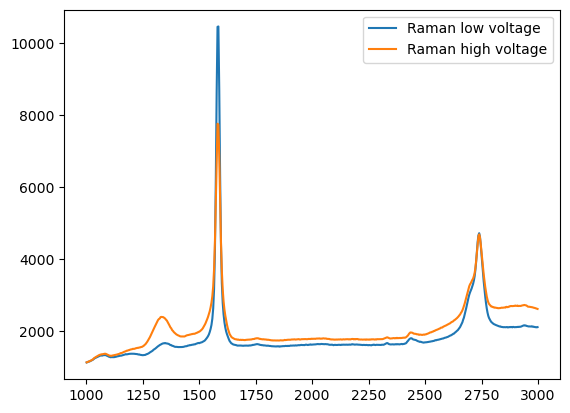

In [25]:
mean_low_red = low_voltage_measurements.sum(axis=1) / low_voltage_measurements.shape[1]
mean_high_red = high_voltage_measurements.sum(axis=1) / high_voltage_measurements.shape[1]

plt.plot(raman_df_red_notime['wave number'],mean_low,label='Raman low voltage')
plt.plot(raman_df_red_notime['wave number'],mean_high,label='Raman high voltage')
plt.legend()

In [28]:
corr_blue_lowvolt = background_red.backcor(np.array(raman_df_notime['wave number']),np.array(mean_low),ord=3,s=1e-3,fct='atq')
corr_blue_highvolt = background_red.backcor(np.array(raman_df_notime['wave number']),np.array(mean_high),ord=3,fct='atq')

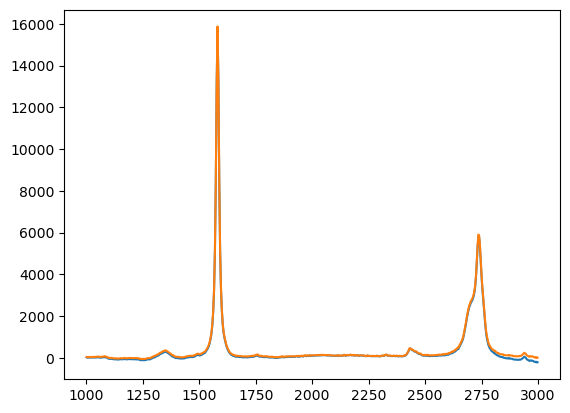